## Final Project Submission

Please fill out:
* Student name:Shuru Ebale 
* Student pace:part time
* Scheduled project review date/time: 
* Instructor name: Noah Kandie/William Okomba
* Blog post URL:


# Project Business Problem
The following document presents findings from the analysis of data from the provided sources. Microsoft is considering movie production and so they'd like to have the right insights to see how they can make it a successful endeavour. The dataframes used include the titles csv, gross and tmdb movies which had data on the movies' popularity.(The ratings file had an error so there was no access to it.)

### Titles Dataframe

In [66]:
# Load all the respective data
import numpy as np
import pandas as pd
import csv

from matplotlib import pyplot as plt
%matplotlib inline

titles = pd.read_csv('zippedData/imdb.title.basics.csv/title.basics.csv')
titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


##### Cleaning

In [32]:
#Identify missing values
titles.isnull().any()

tconst             False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [33]:
titles[titles['original_title'].isna()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
39095,tt2397619,Woody Allen: A Documentary,NaN,2012,195.0,NaN
58624,tt3414266,The Outer Loop,NaN,2013,78.0,NaN
62944,tt3616658,The Hangman,NaN,2017,NaN,NaN
79274,tt4548042,Urban Legend: The Blind Side Strangler,NaN,2016,NaN,NaN
80116,tt4599436,Please Don't Eat the Pansies,NaN,2016,NaN,NaN
82058,tt4715728,Regen,NaN,2016,NaN,NaN
82308,tt4732998,Limbo,NaN,2017,NaN,NaN
85353,tt4940426,OldZilla,NaN,2018,NaN,NaN
104040,tt6092540,Rangreza,NaN,2017,NaN,NaN
104418,tt6107024,The Cage,NaN,2017,NaN,NaN


In [34]:
#Identifying NaNs
titles.isna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
146139,False,False,False,False,False,False
146140,False,False,False,False,True,False
146141,False,False,False,False,True,False
146142,False,False,False,False,False,True


In [35]:
titles.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [36]:
#Drop missing values
titles.dropna()
titles.dropna(axis=1)

,tconst,primary_title,start_year
0,tt0063540,Sunghursh,2013
1,tt0066787,One Day Before the Rainy Season,2019
2,tt0069049,The Other Side of the Wind,2018
3,tt0069204,Sabse Bada Sukh,2018
4,tt0100275,The Wandering Soap Opera,2017
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015
146141,tt9916706,Dankyavar Danka,2013
146142,tt9916730,6 Gunn,2017


In [37]:
#Identifying duplicates
titles.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [152]:
#Drop Duplicate Rows and columns
titles.drop_duplicates()
titles.drop_duplicates(subset='runtime_minutes')
new_titles = titles.drop_duplicates()

new_titles.rename(columns={'original_title': 'title'}, inplace=True)

new_titles

,tconst,primary_title,title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


### Graph 1
The first metric that could be useful is to know the trends of movie production is value counts of the movies made over the years. Analyzing the value counts of movies produced over the years provides valuable insights into the dynamic landscape of the film industry. This approach allows for the identification of temporal trends, revealing shifts in popular genres, technological advancements, and cultural influences. By understanding the historical patterns of movie production, stakeholders can make informed decisions about content creation, distribution strategies, and audience preferences. This data-driven approach aids filmmakers, studios, and researchers in navigating the evolving landscape of the film industry and adapting to changing market dynamics.

In [39]:
new_titles['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

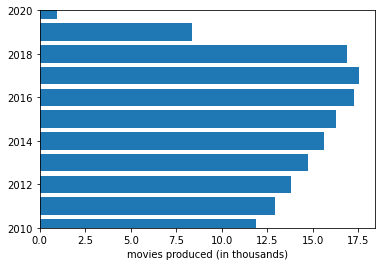

In [69]:
#Plotting the graph

fig, ax = plt.subplots()

start_year_values = new_titles['start_year'].value_counts()


scaling_factor = 1000 # Scaling down to thousands
scaled_values = [value / scaling_factor for value in start_year_values]


ax.barh(
    y=start_year_values.index,
    width=scaled_values)

ax.set_xlabel('movies produced (in thousands)')


plt.ylim(2010, 2020)

plt.show()

##### Most movies were produced between 2010 and 2020.
The horizontal bar graph representing movie production between 2020 and 2010 provides interesting insights into the film industry during this period. The consistent rise in production from the early 2010s, peaking around 2017 at approximately 17,500 movies, suggests a period of growth and increased activity in the industry. This surge may be attributed to factors such as advancements in technology, the rise of streaming platforms, and increased globalization of film production.

However, the subsequent decline in movie production from 2017 to 2020, with the lowest point at around 1,500 movies in 2020, indicates a significant downturn. Several factors could contribute to this decline, including external events like the global COVID-19 pandemic, which disrupted film production schedules, led to the closure of theaters, and impacted overall industry dynamics.

The observed trend underscores the sensitivity of the film industry to external factors, emphasizing its adaptability and resilience. Filmmakers and industry stakeholders may need to navigate challenges, adjust strategies, and explore new models of production and distribution in response to changing circumstances. The insights gained from this analysis can inform future decision-making within the film industry, encouraging adaptability and strategic planning to mitigate risks and capitalize on emerging opportunities.





### Graph 2

Analyzing the value counts of movie genres serves as a crucial step in understanding the landscape of the film industry. It offers insights into the popularity of genres, guiding content creators, advertisers, and industry stakeholders in making informed decisions. From shaping content strategy and targeting specific audiences to optimizing programming schedules and allocating resources, genre value counts provide valuable data for navigating the dynamic and competitive world of filmmaking. Moreover, these counts offer cultural insights, reflecting shifts in societal interests and trends over time. Overall, genre value counts play a pivotal role in decision-making, programming, and strategic planning within the film and entertainment sector.

In [62]:
#Finding out the categorical data distribution in the genres of movies produced

new_titles['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Music,Musical,Reality-TV           1
Adventure,Comedy,Reality-TV        1
History,Sci-Fi,Thriller            1
Comedy,History,Sport               1
Crime,Western                      1
Name: genres, Length: 1085, dtype: int64

In [65]:
#Finding the top ten genres

genres_value_counts = new_titles['genres'].value_counts()

top_ten_genres = genres_value_counts.head(10)

top_ten_genres

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

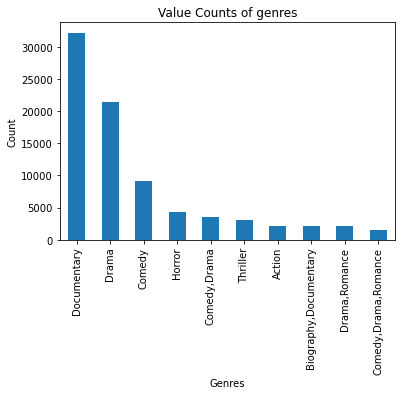

In [78]:
import matplotlib.pyplot as plt

# Plot the bar graph
top_ten_genres.plot.bar()


# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Value Counts of genres')

plt.show()


##### Insights from the graph

The graph illustrating the top ten produced genres reveals valuable insights into the preferences of filmmakers and the industry's content landscape. The dominance of documentaries as the most produced genre suggests a growing interest in non-fiction storytelling and factual narratives. The high production of drama and comedy aligns with their perennial popularity, reflecting their widespread appeal to audiences. The presence of horror in the top genres indicates a continued interest in suspenseful and thrilling storytelling. Genres like thriller, action, and drama romance, although lower in production, still hold significance, contributing diversity to the cinematic landscape. The varying positions of these genres highlight the dynamic nature of audience tastes and industry trends, urging filmmakers and content creators to balance popular genres with niche offerings for a well-rounded and engaging content library.

### Movie Gross Section


In [209]:
Movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv/bom.movie_gross.csv')
Movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


###### Cleaning

In [52]:
#Handling missing data
Movie_gross.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [155]:
#Dropping missing rows with missing values
Movie_gross.dropna()
New_Gross = Movie_gross.dropna()
New_Gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [54]:
#Identifying duplicates
Movie_gross.duplicated().any

<bound method Series.any of 0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool>

In [149]:
New_Gross.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


#### Grouping the studios producing the movies and the income made in the respective years
Grouping movie studios by their annual income serves as a strategic approach for comprehensive performance evaluation and market analysis. This method facilitates the identification of high-performing studios, enables the assessment of market share, and supports strategic decision-making for collaborations or investments. Investors use these groupings to gauge financial health, while studios can tailor their content strategy based on income insights. This approach also aids in understanding industry trends, assessing risks, and benchmarking against competitors. Overall, grouping studios by income offers a valuable lens for stakeholders to navigate the dynamic landscape of the film industry, fostering informed decision-making and strategic planning.

In [100]:
selected_columns = New_Gross[['studio', 'foreign_gross', 'year']]
selected_columns

,studio,foreign_gross,year
0,BV,652000000,2010
1,BV,691300000,2010
2,WB,664300000,2010
3,WB,535700000,2010
4,P/DW,513900000,2010
...,...,...,...
3275,LGF,1500000,2018
3286,IFC,229000,2018
3309,Grindstone,256000,2018
3342,Darin Southa,5200,2018


In [107]:
# Group by 'studios' and 'year' and sum the 'foreign_gross' values
sum_foreign_gross = New_Gross.groupby(['studio', 'year'])['foreign_gross'].sum().reset_index()

sum_foreign_gross.head(50)

,studio,year,foreign_gross
0,3D,2010,9900000
1,A24,2013,1760000013300000
2,A24,2014,6300000280000024000002100000
3,A24,2015,11400000207000009700000
4,A24,2016,37200000153000002100000120000062200
5,A24,2017,3000000087000005300000
6,A24,2018,3530000017000000
7,AF,2012,3100000400000
8,AGF,2011,161000
9,AR,2016,57700000


The following code groups each studio and their sum 'foreign_gross' with the corresponding year into tables of their own.

In [106]:
# Group by 'studios' and 'year'
grouped_data = sum_foreign_gross.groupby(['studio', 'year'])['foreign_gross'].sum().reset_index()


# Iterate over each studio and create separate tables
for studio in grouped_data['studio'].unique():
    studio_table = grouped_data[grouped_data['studio'] == studio].reset_index(drop=True)
    print(f"Table for {studio}:\n{studio_table}\n")

Table for 3D:
  studio  year foreign_gross
0     3D  2010       9900000

Table for A24:
  studio  year                        foreign_gross
0    A24  2013                     1760000013300000
1    A24  2014         6300000280000024000002100000
2    A24  2015              11400000207000009700000
3    A24  2016  37200000153000002100000120000062200
4    A24  2017               3000000087000005300000
5    A24  2018                     3530000017000000

Table for AF:
  studio  year  foreign_gross
0     AF  2012  3100000400000

Table for AGF:
  studio  year foreign_gross
0    AGF  2011        161000

Table for AR:
  studio  year foreign_gross
0     AR  2016      57700000

Table for ATO:
  studio  year foreign_gross
0    ATO  2010         40700
1    ATO  2013        794000

Table for Abr.:
  studio  year foreign_gross
0   Abr.  2010        901000
1   Abr.  2016       9400000

Table for Affirm:
   studio  year foreign_gross
0  Affirm  2017        140000
1  Affirm  2018       5500000

Table for

We will use three random studios to display their income over their years of production. The studios are Fox, A24 and WB.

In [115]:
# Create a dictionary to store studio tables
studio_tables = {}

# Iterate over each studio and create separate tables
for studio in grouped_data['studio'].unique():
    studio_table = grouped_data[grouped_data['studio'] == studio].reset_index(drop=True)
    studio_tables[studio] = studio_table

# Access Fox table
specific_studio_table = studio_tables['Fox']
print(f"Table for Fox:\n{specific_studio_table}\n")

# Access A24 table
specific_studio_table = studio_tables['A24']
print(f"Table for A24:\n{specific_studio_table}\n")

# Access WB table
specific_studio_table = studio_tables['WB']
print(f"Table for WB:\n{specific_studio_table}\n")

Table for Fox:
  studio  year                                      foreign_gross
0    Fox  2010  3113000001855000001946000001377000001000000008...
1    Fox  2011  3410000003050000002072000002096000001191000001...
2    Fox  2012  7159000004840000002769000002363000001017000006...
3    Fox  2013  4000000002823000002373000001995000001609000007...
4    Fox  2014  5139000005021000004445000003686000002897000002...
5    Fox  2015  4017000003493000002861000002086000002372000002...
6    Fox  2016  4200000003885000003776000003445000002865000001...
7    Fox  2017  3927000003530000003438000002607000003107000002...
8    Fox  2018  6872000004605000002302000001095000001047000003...

Table for A24:
  studio  year                        foreign_gross
0    A24  2013                     1760000013300000
1    A24  2014         6300000280000024000002100000
2    A24  2015              11400000207000009700000
3    A24  2016  37200000153000002100000120000062200
4    A24  2017               30000000870000053000

Now we plot visualisations for each Studio Table.

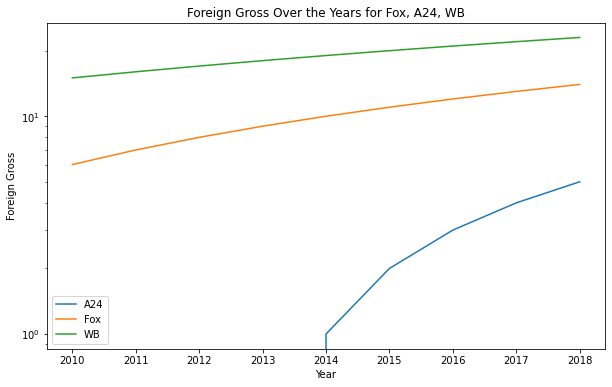

In [148]:
target_studios = ['Fox', 'A24', 'WB']

# Create a dictionary to store studio tables
studio_tables = {}

# Create a single plot for all specified studios
plt.figure(figsize=(10, 6))

# Iterate over each studio and create separate tables and lines on the same plot
for studio in grouped_data['studio'].unique():
    studio_table = grouped_data[grouped_data['studio'] == studio].reset_index(drop=True)
    studio_tables[studio] = studio_table

    # Plotting code only for the specified studios
    if studio in target_studios:
        plt.plot(studio_table['year'], studio_table['foreign_gross'], label=studio)

# Set plot details
plt.title(f'Foreign Gross Over the Years for {", ".join(target_studios)}')
plt.xlabel('Year')
plt.ylabel('Foreign Gross')
plt.legend()

plt.yscale('log')
plt.show()

##### Insights
The continuous increase in foreign gross over time, as depicted by the line graph, signifies a positive trend in the international revenue generated by the films. This trend suggests that the movies produced have been increasingly successful in capturing audiences beyond domestic markets. Several factors could contribute to this upward trajectory, including the globalization of the film industry, expanded distribution channels, and the rising popularity of international cinema. Additionally, the graph may indicate effective marketing strategies, strong audience appeal, and successful penetration into diverse markets. Filmmakers and studios can leverage these insights to further tailor their content, distribution, and marketing strategies to capitalize on the growing global audience and maximize foreign revenue streams.

### Popularity

In [224]:
pop = pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv')
pop

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### Cleaning

In [225]:
pop.isnull().any()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [226]:
pop.duplicated().any()

False

In [227]:
pop.drop(columns=['original_language', 'genre_ids', 'original_title', 'vote_count', 'release_date', 'id'], inplace=True)
pop

,Unnamed: 0,popularity,title,vote_average
0,0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7
1,1,28.734,How to Train Your Dragon,7.7
2,2,28.515,Iron Man 2,6.8
3,3,28.005,Toy Story,7.9
4,4,27.920,Inception,8.3
...,...,...,...,...
26512,26512,0.600,Laboratory Conditions,0.0
26513,26513,0.600,_EXHIBIT_84xxx_,0.0
26514,26514,0.600,The Last One,0.0
26515,26515,0.600,Trailer Made,0.0


### Merging the three csv files to come up with collective insights

In [237]:
merged_df = pd.merge(new_titles, New_Gross, on='title', how='inner')
merged_df

,tconst,primary_title,title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000,2012
1,tt2404548,On the Road,On the Road,2011,90.0,Drama,IFC,744000.0,8000000,2012
2,tt3872966,On the Road,On the Road,2013,87.0,Documentary,IFC,744000.0,8000000,2012
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,IFC,744000.0,8000000,2012
4,tt5389486,On the Road,On the Road,2015,39.0,Documentary,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...,...,...
1753,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",Par.,31700000.0,1800000,2018
1754,tt8306090,Leaving,Leaving,2017,50.0,Drama,IFC,176000.0,893000,2010
1755,tt8802728,The Witch,The Witch,2018,NaN,Horror,A24,25100000.0,15300000,2016
1756,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Strand,10800.0,150000,2010


In [230]:
# removing repetitive/or unnecessary columns

merged_df.drop(columns=['primary_title','start_year'], inplace=True)
merged_df

,tconst,title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",IFC,744000.0,8000000,2012
1,tt2404548,On the Road,90.0,Drama,IFC,744000.0,8000000,2012
2,tt3872966,On the Road,87.0,Documentary,IFC,744000.0,8000000,2012
3,tt4339118,On the Road,89.0,Drama,IFC,744000.0,8000000,2012
4,tt5389486,On the Road,39.0,Documentary,IFC,744000.0,8000000,2012
...,...,...,...,...,...,...,...,...
1753,tt8097306,Nobody's Fool,110.0,"Comedy,Drama,Romance",Par.,31700000.0,1800000,2018
1754,tt8306090,Leaving,50.0,Drama,IFC,176000.0,893000,2010
1755,tt8802728,The Witch,NaN,Horror,A24,25100000.0,15300000,2016
1756,tt8851262,Spring Fever,NaN,"Comedy,Horror",Strand,10800.0,150000,2010


In [270]:
merged_df = pd.merge(pop, merged_df, on='title', how='inner')

In [249]:
merged_df

,Unnamed: 0,popularity,title,vote_average,tconst,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,1,28.734,How to Train Your Dragon,7.7,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",P/DW,217600000.0,277300000,2010
1,2,28.515,Iron Man 2,6.8,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",Par.,312400000.0,311500000,2010
2,4,27.920,Inception,8.3,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000,2010
3,7,24.445,Toy Story 3,7.7,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",BV,415000000.0,652000000,2010
4,8,23.673,Despicable Me,7.2,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24241,9.012,Beirut,6.2,tt4669264,Beirut,2018,109.0,"Drama,Thriller",BST,5000000.0,2500000,2018
2096,24251,8.950,The Bookshop,6.7,tt3127022,The Bookshop,2017,113.0,Drama,Greenwich,1600000.0,9900000,2018
2097,24259,8.768,The Children Act,6.6,tt6040662,The Children Act,2017,105.0,Drama,A24,548000.0,17000000,2018
2098,24335,7.904,Show Dogs,5.9,tt5691024,Show Dogs,2018,92.0,"Adventure,Comedy,Family",Global Road,17900000.0,21300000,2018


###### Cleaning the new merged dataframe

In [250]:
merged_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2095    False
2096    False
2097    False
2098    False
2099    False
Length: 2100, dtype: bool

In [251]:
duplicates = merged_df.duplicated(subset=['title'], keep='first')
df_new = merged_df[~duplicates]

df_new.drop(columns=['start_year'], inplace=True)
df_new

C:\Users\USER\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,popularity,title,vote_average,tconst,primary_title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,1,28.734,How to Train Your Dragon,7.7,tt0892769,How to Train Your Dragon,98.0,"Action,Adventure,Animation",P/DW,217600000.0,277300000,2010
1,2,28.515,Iron Man 2,6.8,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",Par.,312400000.0,311500000,2010
2,4,27.920,Inception,8.3,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000,2010
3,7,24.445,Toy Story 3,7.7,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",BV,415000000.0,652000000,2010
4,8,23.673,Despicable Me,7.2,tt1323594,Despicable Me,95.0,"Animation,Comedy,Family",Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24241,9.012,Beirut,6.2,tt4669264,Beirut,109.0,"Drama,Thriller",BST,5000000.0,2500000,2018
2096,24251,8.950,The Bookshop,6.7,tt3127022,The Bookshop,113.0,Drama,Greenwich,1600000.0,9900000,2018
2097,24259,8.768,The Children Act,6.6,tt6040662,The Children Act,105.0,Drama,A24,548000.0,17000000,2018
2098,24335,7.904,Show Dogs,5.9,tt5691024,Show Dogs,92.0,"Adventure,Comedy,Family",Global Road,17900000.0,21300000,2018


In [252]:
df_new.isnull().any()

Unnamed: 0         False
popularity         False
title              False
vote_average       False
tconst             False
primary_title      False
runtime_minutes     True
genres              True
studio             False
domestic_gross     False
foreign_gross      False
year               False
dtype: bool

In [253]:
df_new = df_new.dropna()
df_new

,Unnamed: 0,popularity,title,vote_average,tconst,primary_title,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,1,28.734,How to Train Your Dragon,7.7,tt0892769,How to Train Your Dragon,98.0,"Action,Adventure,Animation",P/DW,217600000.0,277300000,2010
1,2,28.515,Iron Man 2,6.8,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",Par.,312400000.0,311500000,2010
2,4,27.920,Inception,8.3,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",WB,292600000.0,535700000,2010
3,7,24.445,Toy Story 3,7.7,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",BV,415000000.0,652000000,2010
4,8,23.673,Despicable Me,7.2,tt1323594,Despicable Me,95.0,"Animation,Comedy,Family",Uni.,251500000.0,291600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,24241,9.012,Beirut,6.2,tt4669264,Beirut,109.0,"Drama,Thriller",BST,5000000.0,2500000,2018
2096,24251,8.950,The Bookshop,6.7,tt3127022,The Bookshop,113.0,Drama,Greenwich,1600000.0,9900000,2018
2097,24259,8.768,The Children Act,6.6,tt6040662,The Children Act,105.0,Drama,A24,548000.0,17000000,2018
2098,24335,7.904,Show Dogs,5.9,tt5691024,Show Dogs,92.0,"Adventure,Comedy,Family",Global Road,17900000.0,21300000,2018


### Analysis

In [254]:
df_new['genres'].value_counts()

Adventure,Animation,Comedy    63
Comedy,Drama,Romance          49
Comedy,Drama                  48
Drama                         43
Action,Adventure,Sci-Fi       43
                              ..
Comedy,Horror,Romance          1
Comedy,Western                 1
Documentary,History            1
Comedy,Mystery,Romance         1
Adventure,Drama,History        1
Name: genres, Length: 218, dtype: int64

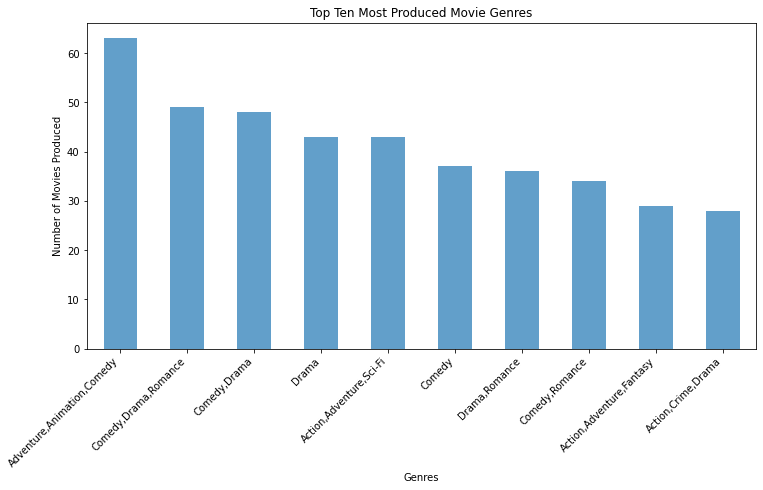

In [268]:
# Find the top ten most produced movie genres based on value counts
top_genres = df_new['genres'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', alpha=0.7)
plt.title('Top Ten Most Produced Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

This graph displays the prevalent repetitive production of comedy related movies.

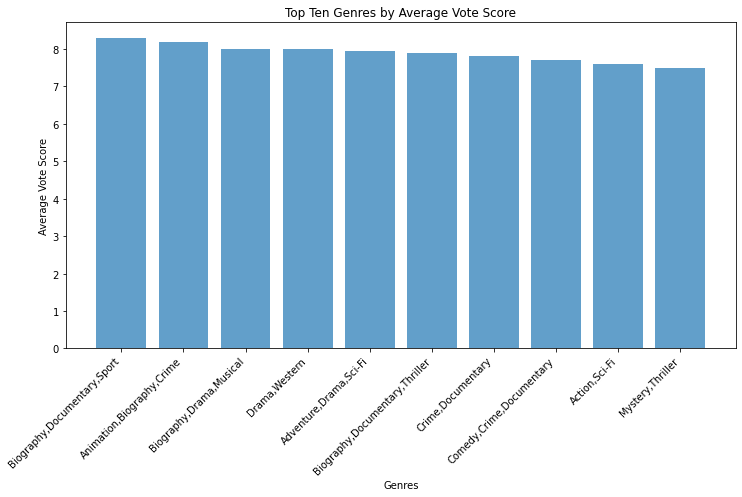

In [269]:
# Create a pivot table to calculate average vote scores for each genre
pivot_table = pd.pivot_table(df_new, values='vote_average', index='genres', aggfunc='mean')

# Sort genres based on average vote scores in descending order
sorted_genres = pivot_table.sort_values(by='vote_average', ascending=False)

# Select the top ten genres
top_ten_genres = sorted_genres.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_ten_genres.index, top_ten_genres['vote_average'], alpha=0.7)
plt.title('Top Ten Genres by Average Vote Score')
plt.xlabel('Genres')
plt.ylabel('Average Vote Score')
plt.xticks(rotation=45, ha='right')
plt.show()

Even though comedy productions were more, the more popular genres were documentary related movies. And this repeats itself across the board. They'd therefore be most recommended genre for Microsoft to invest in.

## Conclusion
In conclusion, the comprehensive analysis of movie-related prompts provides valuable insights for strategic decision-making within the film industry. Exploring movie production trends, genre popularity, and the financial performance of studios offers a nuanced understanding of the ever-evolving cinematic landscape.

The primary recommendation for the best genre to invest in is documentary production, supported by its consistent top ranking in popularity polls. Documentaries demonstrate broad audience appeal and a resilient demand, making them a strategic choice for investors seeking stability and potentially high returns. Beyond this primary recommendation, three additional points offer valuable considerations:

1. **Explore Niche Genres:** While established genres like documentaries, drama, and comedy enjoy widespread popularity, exploring niche genres or emerging thematic trends can present unique opportunities for innovation and audience engagement.

2. **Strategic Partnerships:** Collaboration with successful studios, distribution platforms, or international partners can enhance the reach and impact of film productions. Strategic partnerships provide access to diverse markets and resources, fostering growth and sustainability.

3. **Follow What's Popular:** Keep an eye on what people are talking about and make films that reflect current trends and social issues. Creating content that resonates with what's happening in society can attract a wider audience and generate positive attention. By staying in tune with popular topics and addressing real-world issues, studios can make movies that connect with audiences in today's ever-changing world

4. **Global Market Adaptability:** Studios with a proven track record of adapting to global markets and cultural diversity present attractive investment opportunities. Understanding and catering to international audiences can amplify a film's success and financial returns.

In summary, a diversified investment strategy that combines the stability of popular genres, exploration of niche markets, strategic partnerships, technological innovation, and global market adaptability can position investors for success in the dynamic and competitive film industry.